In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy as np
import json

In [16]:
with open('./solo/sequence.0/step0.frame_data.json') as json_file:
    data = json.load(json_file)

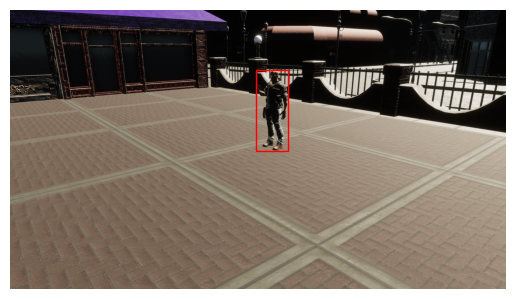

In [18]:

caption = data['captures'][-1]
bbox = caption['annotations'][-1]['values'][0]
origin, dimension = bbox['origin'], bbox['dimension']
img = mpimg.imread('./solo/sequence.0/step0.camera.png')

fig, ax = plt.subplots()
ax.imshow(img)

rect = patches.Rectangle(origin, dimension[0], dimension[1], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.axis('off')

plt.show()

[2278.0, 421.0] [134.0, 454.0]


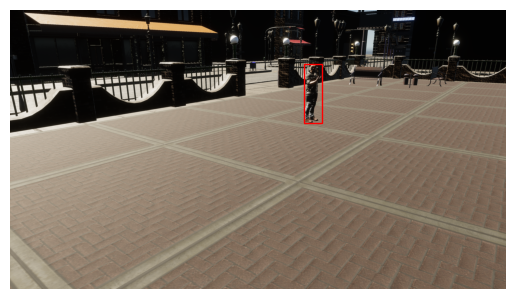

In [19]:

caption = data['captures'][0]
bbox = caption['annotations'][0]['values'][0]
origin, dimension = bbox['origin'], bbox['dimension']
print(origin, dimension)
img = mpimg.imread('./solo/sequence.0/step0.camera_0.png')

fig, ax = plt.subplots()
ax.imshow(img)

rect = patches.Rectangle(origin, dimension[0], dimension[1], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.axis('off')

plt.show()